## Save data

In [1]:
import os
import torch
import numpy as np
import cv2
from tqdm import tqdm
import nibabel as nib
from skimage import transform
import matplotlib.image
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
! unzip "/content/drive/MyDrive/Updated_BraTSData_SSA_only.zip"

In [ ]:
! unzip "/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip"

In [6]:
len(os.listdir("/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"))

60

In [7]:
def get_bounding_box(mask):

  y_indices, x_indices = np.where(mask > 0)
  if len(y_indices) == 0:
    return [0,0,0,0,0]
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)

  (xc, yc) = (x_max + x_min)/2, (y_max+ y_min)/2

  (w,h) = (x_max - x_min), (y_max-  y_min)

  bbox = [0, xc, yc, w, h]

  return bbox

In [10]:

def squarify(M,val = 0):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

# create_folders
base = "/content/"
os.makedirs(base + "BraTS_data", exist_ok=True)

os.makedirs(base + "BraTS_data/train/images", exist_ok=True)
os.makedirs(base + "BraTS_data/train/labels", exist_ok=True)

rand_list = [0,0,0,0,1]

src_folder = "/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/"

files = os.listdir(src_folder)[45:]
# files = ["BraTS-SSA-00002-000"]
for i in tqdm(files):
  img =  nib.load(src_folder + i + "/"+ i +"-t2f.nii.gz")
  img = img.get_fdata()

  image_size = 256
  mask =  nib.load(src_folder + i + "/"+ i +"-seg.nii.gz")
  mask = mask.get_fdata()

  num_slices = img.shape[2]
  num_slices_x = img.shape[0]
  num_slices_y = img.shape[1]



  # for s in range(num_slices):
  #   image = img[:,:,s]
  #   msk = mask[:,:,s]
  #   msk[msk>0] = 1
  #   path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".tif"

  #   if msk.max() == 0:
  #     if random.choice(rand_list) == 1:
  #       lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #       image_data_pre = np.clip(image, lower_bound, upper_bound)
  #       d = (np.max(image_data_pre)-np.min(image_data_pre))
  #       d = 1 if d==0 else d
  #       image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #       image_data_pre[image==0] = 0
  #       image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #       # image = np.stack((image, image, image), axis = -1 )
  #       image = np.uint8(image)
  #       cv2.imwrite(path, image)


  #       msk = transform.resize(
  #                       msk,
  #                       (256, 256),
  #                       order=0,
  #                       preserve_range=True,
  #                       mode="constant",
  #                   )
  #       box = get_bounding_box(msk)
  #       if box == [0,0,0,0,0]: continue
  #       f = open(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+".txt",'w')
  #       for p in box:
  #         f.write(str(p/256) + " ")
  #       f.close()

  #   else:

  #     lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #     image_data_pre = np.clip(image, lower_bound, upper_bound)
  #     d = (np.max(image_data_pre)-np.min(image_data_pre))
  #     d = 1 if d==0 else d
  #     image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #     image_data_pre[image==0] = 0
  #     image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #     # image = np.stack((image, image, image), axis = -1 )
  #     image = np.uint8(image)
  #     # image = squarify(image)
  #     cv2.imwrite(path, image)


  #     msk = transform.resize(
  #                     msk,
  #                     (256, 256),
  #                     order=0,
  #                     preserve_range=True,
  #                     mode="constant",
  #                 )
  #     box = get_bounding_box(msk)
  #     if box == [0,0,0,0,0]: continue
  #     f = open(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+".txt",'w')
  #     for p in box:
  #       f.write(str(p/256) + " ")
  #     f.close()


  for s in range(num_slices_x):
    image = img[s,:,:]
    msk = mask[s,:,:]
    msk[msk>0] = 1
    path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".tif"

    if msk.max() == 0:
      if random.choice(rand_list) == 1:
        lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
        image_data_pre = np.clip(image, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image==0] = 0
        image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image = np.uint8(image)
        cv2.imwrite(path, image)


        msk = transform.resize(
                        msk,
                        (256, 256),
                        order=0,
                        preserve_range=True,
                        mode="constant",
                    )
        cv2.imwrite(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+".tif", msk)
        # box = get_bounding_box(msk)
        # if box == [0,0,0,0,0]: continue
        # f = open(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+"x.txt",'w')
        # for p in box:
        #   f.write(str(p/256) + " ")
        # f.close()

    else:

      lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
      image_data_pre = np.clip(image, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image==0] = 0
      image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image = np.uint8(image)
      # image = squarify(image)
      cv2.imwrite(path, image)


      msk = transform.resize(
                      msk,
                      (256, 256),
                      order=0,
                      preserve_range=True,
                      mode="constant",
                  )
      cv2.imwrite(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+".tif", msk)
      # box = get_bounding_box(msk)
      # if box == [0,0,0,0,0]: continue
      # f = open(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+"x.txt",'w')
      # for p in box:
      #   f.write(str(p/256) + " ")
      # f.close()

  # for s in range(num_slices_y):
  #   image = img[:,s,:]
  #   msk = mask[:,s,:]
  #   msk[msk>0] = 1
  #   path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+"y.tif"

  #   if msk.max() == 0:
  #     if random.choice(rand_list) == 1:
  #       lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #       image_data_pre = np.clip(image, lower_bound, upper_bound)
  #       d = (np.max(image_data_pre)-np.min(image_data_pre))
  #       d = 1 if d==0 else d
  #       image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #       image_data_pre[image==0] = 0
  #       image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #       # image = np.stack((image, image, image), axis = -1 )
  #       image = np.uint8(image)
  #       cv2.imwrite(path, image)


  #       msk = transform.resize(
  #                       msk,
  #                       (256, 256),
  #                       order=0,
  #                       preserve_range=True,
  #                       mode="constant",
  #                   )
  #       box = get_bounding_box(msk)
  #       if box == [0,0,0,0,0]: continue
  #       f = open(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+"y.txt",'w')
  #       for p in box:
  #         f.write(str(p/256) + " ")
  #       f.close()

  #   else:

  #     lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #     image_data_pre = np.clip(image, lower_bound, upper_bound)
  #     d = (np.max(image_data_pre)-np.min(image_data_pre))
  #     d = 1 if d==0 else d
  #     image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #     image_data_pre[image==0] = 0
  #     image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #     # image = np.stack((image, image, image), axis = -1 )
  #     image = np.uint8(image)
  #     # image = squarify(image)
  #     cv2.imwrite(path, image)


  #     msk = transform.resize(
  #                     msk,
  #                     (256, 256),
  #                     order=0,
  #                     preserve_range=True,
  #                     mode="constant",
  #                 )
  #     box = get_bounding_box(msk)
  #     if box == [0,0,0,0,0]: continue
  #     f = open(base + "BraTS_data/train/labels/" +i+ "_"+ str(s)+"y.txt",'w')
  #     for p in box:
  #       f.write(str(p/256) + " ")
  #     f.close()




  0%|          | 0/15 [00:00<?, ?it/s]

In [10]:
! rm -r "/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/.ipynb_checkpoints/"

In [1]:

def squarify(M,val = 0):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

# create_folders
base = "/content/"
os.makedirs(base + "BraTS_data", exist_ok=True)

os.makedirs(base + "BraTS_data/valid/images", exist_ok=True)
os.makedirs(base + "BraTS_data/valid/labels", exist_ok=True)

rand_list = [0,0,0,0,1]

src_folder = "/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/"

files = os.listdir(src_folder)[45:]
# files = ["BraTS-SSA-00002-000"]
for i in tqdm(files):
  img =  nib.load(src_folder + i + "/"+ i +"-t2f.nii.gz")
  img = img.get_fdata()

  image_size = 256
  mask =  nib.load(src_folder + i + "/"+ i +"-seg.nii.gz")
  mask = mask.get_fdata()

  num_slices = img.shape[2]
  num_slices_x = img.shape[0]
  num_slices_y = img.shape[1]



  # for s in range(num_slices):
  #   image = img[:,:,s]
  #   msk = mask[:,:,s]
  #   msk[msk>0] = 1
  #   path = base + "BraTS_data/valid/images/" +i+ "_"+ str(s)+".tif"

  #   if msk.max() == 0:
  #     if random.choice(rand_list) == 1:
  #       lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #       image_data_pre = np.clip(image, lower_bound, upper_bound)
  #       d = (np.max(image_data_pre)-np.min(image_data_pre))
  #       d = 1 if d==0 else d
  #       image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #       image_data_pre[image==0] = 0
  #       image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #       # image = np.stack((image, image, image), axis = -1 )
  #       image = np.uint8(image)
  #       cv2.imwrite(path, image)


  #       msk = transform.resize(
  #                       msk,
  #                       (256, 256),
  #                       order=0,
  #                       preserve_range=True,
  #                       mode="constant",
  #                   )
  #       box = get_bounding_box(msk)
  #       if box == [0,0,0,0,0]: continue
  #       f = open(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+".txt",'w')
  #       for p in box:
  #         f.write(str(p/256) + " ")
  #       f.close()

  #   else:

  #     lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #     image_data_pre = np.clip(image, lower_bound, upper_bound)
  #     d = (np.max(image_data_pre)-np.min(image_data_pre))
  #     d = 1 if d==0 else d
  #     image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #     image_data_pre[image==0] = 0
  #     image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #     # image = np.stack((image, image, image), axis = -1 )
  #     image = np.uint8(image)
  #     # image = squarify(image)
  #     cv2.imwrite(path, image)


  #     msk = transform.resize(
  #                     msk,
  #                     (256, 256),
  #                     order=0,
  #                     preserve_range=True,
  #                     mode="constant",
  #                 )
  #     box = get_bounding_box(msk)
  #     if box == [0,0,0,0,0]: continue
  #     f = open(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+".txt",'w')
  #     for p in box:
  #       f.write(str(p/256) + " ")
  #     f.close()


  for s in range(num_slices_x):
    image = img[s,:,:]
    msk = mask[s,:,:]
    msk[msk>0] = 1
    path = base + "BraTS_data/valid/images/" +i+ "_"+ str(s)+"x.tif"

    if msk.max() == 0:
      if random.choice(rand_list) == 1:
        lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
        image_data_pre = np.clip(image, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image==0] = 0
        image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image = np.uint8(image)
        cv2.imwrite(path, image)


        msk = transform.resize(
                        msk,
                        (256, 256),
                        order=0,
                        preserve_range=True,
                        mode="constant",
                    )
        box = get_bounding_box(msk)
        if box == [0,0,0,0,0]: continue
        f = open(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"x.txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()

    else:

      lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
      image_data_pre = np.clip(image, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image==0] = 0
      image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image = np.uint8(image)
      # image = squarify(image)
      cv2.imwrite(path, image)


      msk = transform.resize(
                      msk,
                      (256, 256),
                      order=0,
                      preserve_range=True,
                      mode="constant",
                  )
      box = get_bounding_box(msk)
      if box == [0,0,0,0,0]: continue
      f = open(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"x.txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()

  # for s in range(num_slices_y):
  #   image = img[:,s,:]
  #   msk = mask[:,s,:]
  #   msk[msk>0] = 1
  #   path = base + "BraTS_data/valid/images/" +i+ "_"+ str(s)+"y.tif"

  #   if msk.max() == 0:
  #     if random.choice(rand_list) == 1:
  #       lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #       image_data_pre = np.clip(image, lower_bound, upper_bound)
  #       d = (np.max(image_data_pre)-np.min(image_data_pre))
  #       d = 1 if d==0 else d
  #       image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #       image_data_pre[image==0] = 0
  #       image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #       # image = np.stack((image, image, image), axis = -1 )
  #       image = np.uint8(image)
  #       cv2.imwrite(path, image)


  #       msk = transform.resize(
  #                       msk,
  #                       (256, 256),
  #                       order=0,
  #                       preserve_range=True,
  #                       mode="constant",
  #                   )
  #       box = get_bounding_box(msk)
  #       if box == [0,0,0,0,0]: continue
  #       f = open(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"y.txt",'w')
  #       for p in box:
  #         f.write(str(p/256) + " ")
  #       f.close()

  #   else:

  #     lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
  #     image_data_pre = np.clip(image, lower_bound, upper_bound)
  #     d = (np.max(image_data_pre)-np.min(image_data_pre))
  #     d = 1 if d==0 else d
  #     image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #     image_data_pre[image==0] = 0
  #     image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #     # image = np.stack((image, image, image), axis = -1 )
  #     image = np.uint8(image)
  #     # image = squarify(image)
  #     cv2.imwrite(path, image)


  #     msk = transform.resize(
  #                     msk,
  #                     (256, 256),
  #                     order=0,
  #                     preserve_range=True,
  #                     mode="constant",
  #                 )
  #     box = get_bounding_box(msk)
  #     if box == [0,0,0,0,0]: continue
  #     f = open(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"y.txt",'w')
  #     for p in box:
  #       f.write(str(p/256) + " ")
  #     f.close()




NameError: ignored

In [13]:
! rm -r "/content/BraTS_data"

In [ ]:
! rm -r "/content/runs"

## Model

In [ ]:
! pip install ultralytics



In [ ]:
# ! wget https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1 -O pothole_dataset_v8.zip

In [ ]:
# ! unzip pothole_dataset_v8.zip

In [15]:
from ultralytics import YOLO
# import cv2
import matplotlib.pyplot as plt

In [ ]:
# ! yolo task=detect mode=train model=yolov8l.pt imgsz=256 data=/content/BraTS_data/data.yaml epochs=20 batch=8 name=yolov8l_custom_1


In [17]:
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
model.train(data='/content/data.yaml', epochs=200, imgsz=256, pretrained = True, batch = 16, optimizer = "Adam", cos_lr = True,
            cache = True, dropout = 0.5, patience = 30, name = "/content/drive/MyDrive/save_to/yolo/t2f_x_aug",
            translate = 0.0, degrees = 0.0, perspective= 0.0, scale= 0.3, flipud= 0.3, fliplr= 0.3, mosaic = 0.0, mixup= 0.0,
            hsv_h = 0.0, hsv_s = 0.0, hsv_v= 0.0)

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=200, patience=30, batch=16, imgsz=256, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=/content/drive/MyDrive/save_to/yolo/t2f_x_aug, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz


image 1/1 /content/BraTS_data/train/images/BraTS-SSA-00002-000_80.png: 256x256 1 cancer, 34.6ms
Speed: 0.7ms preprocess, 34.6ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 256)


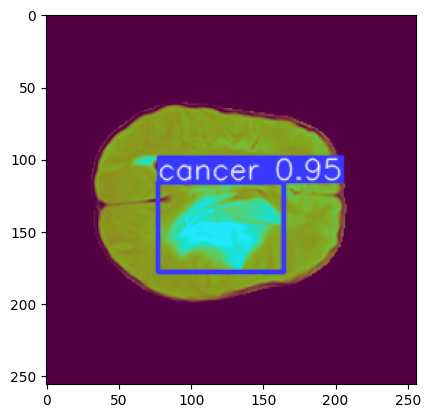

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

res = model("/content/BraTS_data/train/images/BraTS-SSA-00002-000_80.png")
res_plotted = res[0].plot()
# cv2.imshow("result", res_plotted)
plt.imshow(res_plotted, cmap = "gray")

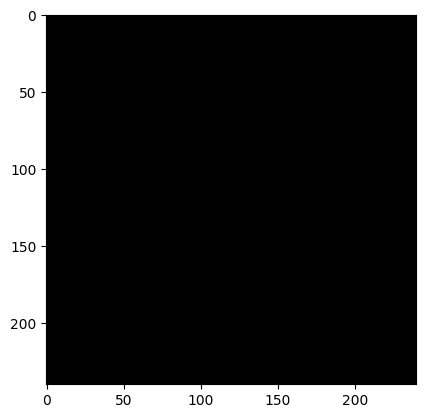

In [ ]:
mask =  nib.load("/content/drive/MyDrive/SSA/BraTS-SSA-00002-000/BraTS-SSA-00002-000-seg.nii.gz")
mask = mask.get_fdata()

plt.imshow(mask[:,:,137],cmap = "gray")

In [ ]:

model = YOLO('/content/runs/detect/train/weights/best.pt')


img =  nib.load("/content/drive/MyDrive/SSA/BraTS-SSA-00002-000/BraTS-SSA-00002-000-t2f.nii.gz")
img = img.get_fdata()
img = img[:,:,20]

lower_bound, upper_bound = np.percentile(img, 0.5), np.percentile(img, 99.5)
image_data_pre = np.clip(img, lower_bound, upper_bound)
d = (np.max(image_data_pre)-np.min(image_data_pre))
d = 1 if d==0 else d
image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
image_data_pre[img==0] = 0
img = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
# image = np.stack((image, image, image), axis = -1 )
img = np.uint8(img)


img = np.stack((img,img,img), axis = -1)
# img = np.expand_dims(img, axis = 0)
print(img.shape)

results = model.predict(img, stream = False)  # return a list of Results objects

# # Process results list
# for result in results:
#     boxes = result.boxes  # Boxes object for bbox outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
#     probs = result.probs  # Class probabilities for classification outputs

255
0
(256, 256, 3)



0: 256x256 1 cancer, 34.7ms
Speed: 0.8ms preprocess, 34.7ms inference, 32.0ms postprocess per image at shape (1, 3, 256, 256)


In [ ]:
boxes = results[0].boxes
boxes.xyxy

tensor([[ 69.1378, 132.1252, 108.7355, 177.1969]], device='cuda:0')

[69, 132, 108, 177]


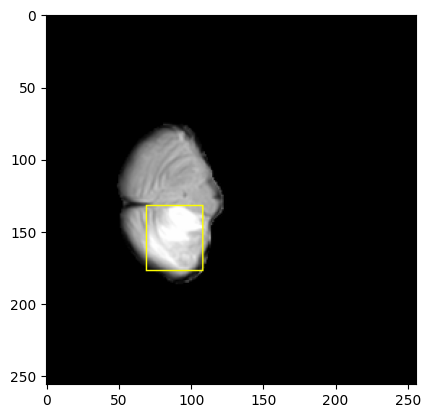

In [ ]:
import cv2


img =  nib.load("/content/drive/MyDrive/SSA/BraTS-SSA-00002-000/BraTS-SSA-00002-000-t2f.nii.gz")
img = img.get_fdata()
img = img[:,:,20]


lower_bound, upper_bound = np.percentile(img, 0.5), np.percentile(img, 99.5)
image_data_pre = np.clip(img, lower_bound, upper_bound)
d = (np.max(image_data_pre)-np.min(image_data_pre))
d = 1 if d==0 else d
image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
image_data_pre[img==0] = 0
img = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
img = np.stack((img, img, img), axis = -1 )
img = np.uint8(img)

# image = np.float32(img)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = image * 255
# image = np.uint8(image)



box = boxes.xyxy[0].cpu().numpy()
box = [int(i) for i in box]
print(box)

colour = (255, 255, 0)
thickness = 1
rectangle_img = cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), colour, thickness)
plt.imshow(rectangle_img, cmap="gray")

In [ ]:

path_for_3d = ""
for i in os.listdir(path_for_3d):
  emb_3d = np.load(path_for_3d+ "/"+ i)
  slices = emb_3d.shape[-1]
  for s in range(slices):
    embd_2d = emb_3d[:,:,:, s]
    np.save("", embd_2d)


In [ ]:
import os
# import torch
import numpy as np

from tqdm import tqdm
import nibabel as nib
from skimage import transform
import matplotlib.image


def get_bounding_box(mask):

  y_indices, x_indices = np.where(mask > 0)
  if len(y_indices) == 0:
    return [0,0,0,0,0]
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)

  (xc, yc) = (x_max + x_min)/2, (y_max+ y_min)/2

  (w,h) = (x_max - x_min), (y_max-  y_min)

  bbox = [0, xc, yc, w, h]

  return bbox


def squarify(M,val = 0):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

# create_folders
base = "/content/"
os.makedirs(base + "BraTS_data_africa", exist_ok=True)
os.makedirs(base + "BraTS_data_africa/train", exist_ok=True)


os.makedirs(base + "BraTS_data_africa/train/images", exist_ok=True)
os.makedirs(base + "BraTS_data_africa/train/labels", exist_ok=True)

rand_list = [0,0,0,0,1]

src_folder = "/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/"
image_size = 256

files = os.listdir(src_folder)[:45]
# files = ["BraTS-SSA-00002-000"]
for i in tqdm(files):
  img_flair =  nib.load(src_folder + i + "/"+ i +"-t2f.nii.gz")
  img_flair = img_flair.get_fdata()

  img_t1 =  nib.load(src_folder + i + "/"+ i +"-t1n.nii.gz")
  img_t1 = img_t1.get_fdata()

  img_t2 =  nib.load(src_folder + i + "/"+ i +"-t2w.nii.gz")
  img_t2 = img_t2.get_fdata()

  img_t1ce =  nib.load(src_folder + i + "/"+ i +"-t1c.nii.gz")
  img_t1ce = img_t1ce.get_fdata()


  mask =  nib.load(src_folder + i + "/"+ i +"-seg.nii.gz")
  mask = mask.get_fdata()

  num_slices_z = mask.shape[2]
  num_slices_x = mask.shape[0]
  num_slices_y = mask.shape[1]


  for z in range(num_slices_z):
    image_f = img_flair[:,:,z]
    image_t1 = img_t1[:,:,z]
    image_t2 = img_t2[:,:,z]
    image_t1c = img_t1ce[:,:,z]

    msk = mask[:,:,z]
    msk[msk>0] = 1
    # path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".png"

    # if msk.max() != 0:
    # if os.path.exists(path): continue
    if msk.max() == 0:
      if random.choice(rand_list) == 1:
        lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
        image_data_pre = np.clip(image_f, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_f==0] = 0
        image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_f = np.uint8(image_f)
        # image = squarify(image)

        cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_flair_z_" + str(z)+ ".tif", image_f)


        lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
        image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_t1==0] = 0
        image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_t1 = np.uint8(image_t1)
        # image = squarify(image)

        cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_t1_z_" + str(z)+ ".tif", image_t1)


        lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
        image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_t2==0] = 0
        image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_t2 = np.uint8(image_t2)

        # image = squarify(image)
        cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_t2_z_" + str(z)+ ".tif", image_t2)



        lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
        image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_t1c==0] = 0
        image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_t1c = np.uint8(image_t1c)

        # image = squarify(image)
        cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_t1ce_z_" + str(z)+ ".tif", image_t1c)


        msk = transform.resize(
                        msk,
                        (256, 256),
                        order=0,
                        preserve_range=True,
                        mode="constant",
                    )
        box = get_bounding_box(msk)
        if box == [0,0,0,0,0]: continue
        f = open(base + "BraTS_data_africa/train/labels/" + i + "_flair_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()

        f = open(base + "BraTS_data_africa/train/labels/" + i + "_t1_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()


        f = open(base + "BraTS_data_africa/train/labels/" + i + "_t2_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()


        f = open(base + "BraTS_data_africa/train/labels/" + i + "_t1ce_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()


    else:
      lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
      image_data_pre = np.clip(image_f, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_f==0] = 0
      image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_f = np.uint8(image_f)
      # image = squarify(image)

      cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_flair_z_" + str(z)+ ".tif", image_f)


      lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
      image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_t1==0] = 0
      image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_t1 = np.uint8(image_t1)
      # image = squarify(image)

      cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_t1_z_" + str(z)+ ".tif", image_t1)


      lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
      image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_t2==0] = 0
      image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_t2 = np.uint8(image_t2)

      # image = squarify(image)
      cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_t2_z_" + str(z)+ ".tif", image_t2)



      lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
      image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_t1c==0] = 0
      image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_t1c = np.uint8(image_t1c)

      # image = squarify(image)
      cv2.imwrite(base + "BraTS_data_africa/train/images/" + i + "_t1ce_z_" + str(z)+ ".tif", image_t1c)


      msk = transform.resize(
                      msk,
                      (256, 256),
                      order=0,
                      preserve_range=True,
                      mode="constant",
                  )
      box = get_bounding_box(msk)
      if box == [0,0,0,0,0]: continue
      f = open(base + "BraTS_data_africa/train/labels/" + i + "_flair_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()

      f = open(base + "BraTS_data_africa/train/labels/" + i + "_t1_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()


      f = open(base + "BraTS_data_africa/train/labels/" + i + "_t2_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()


      f = open(base + "BraTS_data_africa/train/labels/" + i + "_t1ce_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()




  # for y in range(num_slices_y):
  #   image_f = img_flair[:,y,:]
  #   image_t1 = img_t1[:,y,:]
  #   image_t2 = img_t2[:,y,:]
  #   image_t1c = img_t1ce[:,y,:]

  #   msk = mask[:,y,:]
  #   msk[msk>0] = 1
  #   # path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".png"

  #   # if msk.max() != 0:
  #   # if os.path.exists(path): continue
  #   lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
  #   image_data_pre = np.clip(image_f, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_f==0] = 0
  #   image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_f = np.uint8(image_f)

  #   image_f = squarify(image_f)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_flair_y_" + str(y)+ ".png", image_f)


  #   lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
  #   image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1==0] = 0
  #   image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1 = np.uint8(image_t1)

  #   image_t1 = squarify(image_t1)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1_y_" + str(y)+ ".png", image_t1)


  #   lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
  #   image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t2==0] = 0
  #   image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t2 = np.uint8(image_t2)

  #   image_t2 = squarify(image_t2)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t2_y_" + str(y)+ ".png", image_t2)



  #   lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
  #   image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1c==0] = 0
  #   image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1c = np.uint8(image_t1c)

  #   image_t1c = squarify(image_t1c)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1ce_y_" + str(y)+ ".png", image_t1c)


  #   msk = transform.resize(
  #                   msk,
  #                   (256, 256),
  #                   order=0,
  #                   preserve_range=True,
  #                   mode="constant",
  #               )
  #   msk = squarify(msk)
  #   box = get_bounding_box(msk)
  #   f = open(base + "BraTS_data_africa/labels/" + i + "_flair_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()

  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t2_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1ce_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  # for x in range(num_slices_x):
  #   image_f = img_flair[x,:,:]
  #   image_t1 = img_t1[x,:,:]
  #   image_t2 = img_t2[x,:,:]
  #   image_t1c = img_t1ce[x,:,:]

  #   msk = mask[x,:,:]
  #   msk[msk>0] = 1
  #   # path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".png"

  #   # if msk.max() != 0:
  #   # if os.path.exists(path): continue
  #   lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
  #   image_data_pre = np.clip(image_f, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_f==0] = 0
  #   image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_f = np.uint8(image_f)

  #   image_f = squarify(image_f)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_flair_x_" + str(x)+ ".png", image_f)


  #   lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
  #   image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1==0] = 0
  #   image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1 = np.uint8(image_t1)

  #   image_t1 = squarify(image_t1)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1_x_" + str(x)+ ".png", image_t1)


  #   lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
  #   image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t2==0] = 0
  #   image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t2 = np.uint8(image_t2)

  #   image_t2 = squarify(image_t2)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t2_x_" + str(x)+ ".png", image_t2)



  #   lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
  #   image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1c==0] = 0
  #   image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1c = np.uint8(image_t1c)

  #   image_t1c = squarify(image_t1c)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1ce_x_" + str(x)+ ".png", image_t1c)


  #   msk = transform.resize(
  #                   msk,
  #                   (256, 256),
  #                   order=0,
  #                   preserve_range=True,
  #                   mode="constant",
  #               )
  #   msk = squarify(msk)
  #   box = get_bounding_box(msk)
  #   f = open(base + "BraTS_data_africa/labels/" + i + "_flair_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()

  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t2_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1ce_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()




100%|██████████| 45/45 [05:03<00:00,  6.74s/it]


In [ ]:
len(os.listdir("/content/BraTS_data_africa/images"))

2540

In [ ]:
import os
# import torch
import numpy as np

from tqdm import tqdm
import nibabel as nib
from skimage import transform
import matplotlib.image


def get_bounding_box(mask):

  y_indices, x_indices = np.where(mask > 0)
  if len(y_indices) == 0:
    return [0,0,0,0,0]
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)

  (xc, yc) = (x_max + x_min)/2, (y_max+ y_min)/2

  (w,h) = (x_max - x_min), (y_max-  y_min)

  bbox = [0, xc, yc, w, h]

  return bbox


def squarify(M,val = 0):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

# create_folders
base = "/content/"
os.makedirs(base + "BraTS_data_africa", exist_ok=True)
os.makedirs(base + "BraTS_data_africa/valid", exist_ok=True)


os.makedirs(base + "BraTS_data_africa/valid/images", exist_ok=True)
os.makedirs(base + "BraTS_data_africa/valid/labels", exist_ok=True)

rand_list = [0,0,0,0,1]

src_folder = "/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/"
image_size = 256

files = os.listdir(src_folder)[45:]
# files = ["BraTS-SSA-00002-000"]
for i in tqdm(files):
  img_flair =  nib.load(src_folder + i + "/"+ i +"-t2f.nii.gz")
  img_flair = img_flair.get_fdata()

  img_t1 =  nib.load(src_folder + i + "/"+ i +"-t1n.nii.gz")
  img_t1 = img_t1.get_fdata()

  img_t2 =  nib.load(src_folder + i + "/"+ i +"-t2w.nii.gz")
  img_t2 = img_t2.get_fdata()

  img_t1ce =  nib.load(src_folder + i + "/"+ i +"-t1c.nii.gz")
  img_t1ce = img_t1ce.get_fdata()


  mask =  nib.load(src_folder + i + "/"+ i +"-seg.nii.gz")
  mask = mask.get_fdata()

  num_slices_z = mask.shape[2]
  num_slices_x = mask.shape[0]
  num_slices_y = mask.shape[1]


  for z in range(num_slices_z):
    image_f = img_flair[:,:,z]
    image_t1 = img_t1[:,:,z]
    image_t2 = img_t2[:,:,z]
    image_t1c = img_t1ce[:,:,z]

    msk = mask[:,:,z]
    msk[msk>0] = 1
    # path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".png"

    # if msk.max() != 0:
    # if os.path.exists(path): continue
    if msk.max() == 0:
      if random.choice(rand_list) == 1:
        lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
        image_data_pre = np.clip(image_f, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_f==0] = 0
        image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_f = np.uint8(image_f)
        # image = squarify(image)

        cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_flair_z_" + str(z)+ ".tif", image_f)


        lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
        image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_t1==0] = 0
        image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_t1 = np.uint8(image_t1)
        # image = squarify(image)

        cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_t1_z_" + str(z)+ ".tif", image_t1)


        lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
        image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_t2==0] = 0
        image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_t2 = np.uint8(image_t2)

        # image = squarify(image)
        cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_t2_z_" + str(z)+ ".tif", image_t2)



        lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
        image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image_t1c==0] = 0
        image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image_t1c = np.uint8(image_t1c)

        # image = squarify(image)
        cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_t1ce_z_" + str(z)+ ".tif", image_t1c)


        msk = transform.resize(
                        msk,
                        (256, 256),
                        order=0,
                        preserve_range=True,
                        mode="constant",
                    )
        box = get_bounding_box(msk)
        if box == [0,0,0,0,0]: continue
        f = open(base + "BraTS_data_africa/valid/labels/" + i + "_flair_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()

        f = open(base + "BraTS_data_africa/valid/labels/" + i + "_t1_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()


        f = open(base + "BraTS_data_africa/valid/labels/" + i + "_t2_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()


        f = open(base + "BraTS_data_africa/valid/labels/" + i + "_t1ce_z_" + str(z)+ ".txt",'w')
        for p in box:
          f.write(str(p/256) + " ")
        f.close()


    else:
      lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
      image_data_pre = np.clip(image_f, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_f==0] = 0
      image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_f = np.uint8(image_f)
      # image = squarify(image)

      cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_flair_z_" + str(z)+ ".tif", image_f)


      lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
      image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_t1==0] = 0
      image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_t1 = np.uint8(image_t1)
      # image = squarify(image)

      cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_t1_z_" + str(z)+ ".tif", image_t1)


      lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
      image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_t2==0] = 0
      image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_t2 = np.uint8(image_t2)

      # image = squarify(image)
      cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_t2_z_" + str(z)+ ".tif", image_t2)



      lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
      image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image_t1c==0] = 0
      image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image_t1c = np.uint8(image_t1c)

      # image = squarify(image)
      cv2.imwrite(base + "BraTS_data_africa/valid/images/" + i + "_t1ce_z_" + str(z)+ ".tif", image_t1c)


      msk = transform.resize(
                      msk,
                      (256, 256),
                      order=0,
                      preserve_range=True,
                      mode="constant",
                  )
      box = get_bounding_box(msk)
      if box == [0,0,0,0,0]: continue
      f = open(base + "BraTS_data_africa/valid/labels/" + i + "_flair_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()

      f = open(base + "BraTS_data_africa/valid/labels/" + i + "_t1_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()


      f = open(base + "BraTS_data_africa/valid/labels/" + i + "_t2_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()


      f = open(base + "BraTS_data_africa/valid/labels/" + i + "_t1ce_z_" + str(z)+ ".txt",'w')
      for p in box:
        f.write(str(p/256) + " ")
      f.close()




  # for y in range(num_slices_y):
  #   image_f = img_flair[:,y,:]
  #   image_t1 = img_t1[:,y,:]
  #   image_t2 = img_t2[:,y,:]
  #   image_t1c = img_t1ce[:,y,:]

  #   msk = mask[:,y,:]
  #   msk[msk>0] = 1
  #   # path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".png"

  #   # if msk.max() != 0:
  #   # if os.path.exists(path): continue
  #   lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
  #   image_data_pre = np.clip(image_f, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_f==0] = 0
  #   image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_f = np.uint8(image_f)

  #   image_f = squarify(image_f)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_flair_y_" + str(y)+ ".png", image_f)


  #   lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
  #   image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1==0] = 0
  #   image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1 = np.uint8(image_t1)

  #   image_t1 = squarify(image_t1)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1_y_" + str(y)+ ".png", image_t1)


  #   lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
  #   image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t2==0] = 0
  #   image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t2 = np.uint8(image_t2)

  #   image_t2 = squarify(image_t2)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t2_y_" + str(y)+ ".png", image_t2)



  #   lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
  #   image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1c==0] = 0
  #   image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1c = np.uint8(image_t1c)

  #   image_t1c = squarify(image_t1c)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1ce_y_" + str(y)+ ".png", image_t1c)


  #   msk = transform.resize(
  #                   msk,
  #                   (256, 256),
  #                   order=0,
  #                   preserve_range=True,
  #                   mode="constant",
  #               )
  #   msk = squarify(msk)
  #   box = get_bounding_box(msk)
  #   f = open(base + "BraTS_data_africa/labels/" + i + "_flair_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()

  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t2_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1ce_y_" + str(y)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  # for x in range(num_slices_x):
  #   image_f = img_flair[x,:,:]
  #   image_t1 = img_t1[x,:,:]
  #   image_t2 = img_t2[x,:,:]
  #   image_t1c = img_t1ce[x,:,:]

  #   msk = mask[x,:,:]
  #   msk[msk>0] = 1
  #   # path = base + "BraTS_data/train/images/" +i+ "_"+ str(s)+".png"

  #   # if msk.max() != 0:
  #   # if os.path.exists(path): continue
  #   lower_bound, upper_bound = np.percentile(image_f, 0.5), np.percentile(image_f, 99.5)
  #   image_data_pre = np.clip(image_f, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_f==0] = 0
  #   image_f = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_f = np.uint8(image_f)

  #   image_f = squarify(image_f)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_flair_x_" + str(x)+ ".png", image_f)


  #   lower_bound, upper_bound = np.percentile(image_t1, 0.5), np.percentile(image_t1, 99.5)
  #   image_data_pre = np.clip(image_t1, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1==0] = 0
  #   image_t1 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1 = np.uint8(image_t1)

  #   image_t1 = squarify(image_t1)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1_x_" + str(x)+ ".png", image_t1)


  #   lower_bound, upper_bound = np.percentile(image_t2, 0.5), np.percentile(image_t2, 99.5)
  #   image_data_pre = np.clip(image_t2, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t2==0] = 0
  #   image_t2 = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t2 = np.uint8(image_t2)

  #   image_t2 = squarify(image_t2)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t2_x_" + str(x)+ ".png", image_t2)



  #   lower_bound, upper_bound = np.percentile(image_t1c, 0.5), np.percentile(image_t1c, 99.5)
  #   image_data_pre = np.clip(image_t1c, lower_bound, upper_bound)
  #   d = (np.max(image_data_pre)-np.min(image_data_pre))
  #   d = 1 if d==0 else d
  #   image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
  #   image_data_pre[image_t1c==0] = 0
  #   image_t1c = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
  #   # image = np.stack((image, image, image), axis = -1 )
  #   image_t1c = np.uint8(image_t1c)

  #   image_t1c = squarify(image_t1c)
  #   matplotlib.image.imsave(base + "BraTS_data_africa/images/" + i + "_t1ce_x_" + str(x)+ ".png", image_t1c)


  #   msk = transform.resize(
  #                   msk,
  #                   (256, 256),
  #                   order=0,
  #                   preserve_range=True,
  #                   mode="constant",
  #               )
  #   msk = squarify(msk)
  #   box = get_bounding_box(msk)
  #   f = open(base + "BraTS_data_africa/labels/" + i + "_flair_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()

  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t2_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()


  #   f = open(base + "BraTS_data_africa/labels/" + i + "_t1ce_x_" + str(x)+ ".txt",'w')
  #   for p in box:
  #     f.write(str(p/256) + " ")
  #   f.close()




100%|██████████| 15/15 [01:43<00:00,  6.88s/it]


##Testing

In [ ]:

def squarify(M,val = 0):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

# create_folders
base = "/content/"
os.makedirs(base + "BraTS_data", exist_ok=True)

os.makedirs(base + "BraTS_data/valid/images", exist_ok=True)
os.makedirs(base + "BraTS_data/valid/labels", exist_ok=True)

rand_list = [1]

src_folder = "/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/"

files = os.listdir(src_folder)[45:]
# files = ["BraTS-SSA-00002-000"]
for i in tqdm(files):
  img =  nib.load(src_folder + i + "/"+ i +"-t2f.nii.gz")
  img = img.get_fdata()

  image_size = 256
  mask =  nib.load(src_folder + i + "/"+ i +"-seg.nii.gz")
  mask = mask.get_fdata()

  num_slices = img.shape[2]
  num_slices_x = img.shape[0]
  num_slices_y = img.shape[1]



  for s in range(num_slices):
    image = img[:,:,s]
    msk = mask[:,:,s]
    msk[msk>0] = 1
    path = base + "BraTS_data/valid/images/" +i+ "_"+ str(s)+".tif"

    if msk.max() == 0:
      if random.choice(rand_list) == 1:
        lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
        image_data_pre = np.clip(image, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image==0] = 0
        image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image = np.uint8(image)
        cv2.imwrite(path, image)


        msk = transform.resize(
                        msk,
                        (256, 256),
                        order=0,
                        preserve_range=True,
                        mode="constant",
                    )
        cv2.imwrite(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+".tif", msk)
        # box = get_bounding_box(msk)
        # if box == [0,0,0,0,0]: continue
        # f = open(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+".txt",'w')
        # for p in box:
        #   f.write(str(p/256) + " ")
        # f.close()

    else:

      lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
      image_data_pre = np.clip(image, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image==0] = 0
      image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image = np.uint8(image)
      # image = squarify(image)
      cv2.imwrite(path, image)


      msk = transform.resize(
                      msk,
                      (256, 256),
                      order=0,
                      preserve_range=True,
                      mode="constant",
                  )
      cv2.imwrite(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+".tif", msk)




  for s in range(num_slices_x):
    image = img[s,:,:]
    msk = mask[s,:,:]
    msk[msk>0] = 1
    path = base + "BraTS_data/valid/images/" +i+ "_"+ str(s)+"x.tif"

    if msk.max() == 0:
      if random.choice(rand_list) == 1:
        lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
        image_data_pre = np.clip(image, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image==0] = 0
        image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image = np.uint8(image)
        cv2.imwrite(path, image)


        msk = transform.resize(
                        msk,
                        (256, 256),
                        order=0,
                        preserve_range=True,
                        mode="constant",
                    )
        cv2.imwrite(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"x.tif", msk)


    else:

      lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
      image_data_pre = np.clip(image, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image==0] = 0
      image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image = np.uint8(image)
      # image = squarify(image)
      cv2.imwrite(path, image)


      msk = transform.resize(
                      msk,
                      (256, 256),
                      order=0,
                      preserve_range=True,
                      mode="constant",
                  )
      cv2.imwrite(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"x.tif" , msk)

  for s in range(num_slices_y):
    image = img[:,s,:]
    msk = mask[:,s,:]
    msk[msk>0] = 1
    path = base + "BraTS_data/valid/images/" +i+ "_"+ str(s)+"y.tif"

    if msk.max() == 0:
      if random.choice(rand_list) == 1:
        lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
        image_data_pre = np.clip(image, lower_bound, upper_bound)
        d = (np.max(image_data_pre)-np.min(image_data_pre))
        d = 1 if d==0 else d
        image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
        image_data_pre[image==0] = 0
        image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        # image = np.stack((image, image, image), axis = -1 )
        image = np.uint8(image)
        cv2.imwrite(path, image)


        msk = transform.resize(
                        msk,
                        (256, 256),
                        order=0,
                        preserve_range=True,
                        mode="constant",
                    )
        cv2.imwrite(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"y.tif", msk)

    else:

      lower_bound, upper_bound = np.percentile(image, 0.5), np.percentile(image, 99.5)
      image_data_pre = np.clip(image, lower_bound, upper_bound)
      d = (np.max(image_data_pre)-np.min(image_data_pre))
      d = 1 if d==0 else d
      image_data_pre = ((image_data_pre - np.min(image_data_pre))/d) *255.0
      image_data_pre[image==0] = 0
      image = transform.resize(image_data_pre[:,:], (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
      # image = np.stack((image, image, image), axis = -1 )
      image = np.uint8(image)
      # image = squarify(image)
      cv2.imwrite(path, image)


      msk = transform.resize(
                      msk,
                      (256, 256),
                      order=0,
                      preserve_range=True,
                      mode="constant",
                  )
      cv2.imwrite(base + "BraTS_data/valid/labels/" +i+ "_"+ str(s)+"y.tif", msk)


100%|██████████| 15/15 [03:34<00:00, 14.28s/it]


In [12]:
src_folder = "/content/BraTS_data/train/images/"
masks = "/content/BraTS_data/train/labels/"

model = YOLO('/content/drive/MyDrive/save_to/yolo/t2f_zxy/weights/best.pt')

files = os.listdir(src_folder)
for i in files:
  res = model(src_folder  + i)
  res_plotted = res[0].plot()

  mask = cv2.imread(masks+ i, cv2.IMREAD_UNCHANGED)

  fig = plt.figure(figsize=(10, 7))

  fig.add_subplot(1, 2, 1)
  plt.imshow(mask, cmap = "gray")

  fig.add_subplot(1, 2, 2)
  plt.imshow(res_plotted, cmap = "gray")

  plt.show()



NameError: ignored